In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_player=pd.read_csv("myexcel - myexcel.csv.csv")
data_player

In [6]:
data_player.info()

In [7]:
data_player.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [8]:
data_player.duplicated().sum()

0

In [9]:
data_player['Height']= np.random.randint(150,180+1,len(data_player))
data_player

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,157,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,174,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,172,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,154,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,162,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,163,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,156,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,151,231,Kansas,947276.0


In [10]:
data_player.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

##### 1. How many are there in each Team and the percentage splitting with respect to the total employees.


In [11]:
# number of players in each team
team_count=pd.DataFrame(data_player['Team'].value_counts())
team_count

,count
Team,
New Orleans Pelicans,19
Memphis Grizzlies,18
Utah Jazz,16
New York Knicks,16
Milwaukee Bucks,16
Brooklyn Nets,15
Portland Trail Blazers,15
Oklahoma City Thunder,15
Denver Nuggets,15


In [30]:
# percentage distribution with respect to total employee
team_sum=team_count['count'].sum()
team_sum
team_count['Percentage']=round((team_count['count']/team_sum)*100,2)
team_count


,count,Percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


##### 2. Segregate the employees w.r.t different positions.

In [13]:
data_player['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [14]:
seg_emp=data_player.groupby('Position')
for Position, Players in seg_emp:
    print(f"Players in {Position}:")
    print(Players)


Players in C:
                Name                    Team  Number Position  Age  Height  \
7       Kelly Olynyk          Boston Celtics      41        C   25     150   
10   Jared Sullinger          Boston Celtics       7        C   24     160   
14      Tyler Zeller          Boston Celtics      44        C   26     164   
23       Brook Lopez           Brooklyn Nets      11        C   28     176   
27        Henry Sims           Brooklyn Nets      14        C   26     174   
..               ...                     ...     ...      ...  ...     ...   
439    Mason Plumlee  Portland Trail Blazers      24        C   26     164   
447      Rudy Gobert               Utah Jazz      27        C   23     177   
455     Tibor Pleiss               Utah Jazz      21        C   26     156   
456      Jeff Withey               Utah Jazz      24        C   26     151   
457         Priyanka               Utah Jazz      34        C   25     178   

     Weight         College      Salary  
7      

##### 3. .Find from which age group most of the employees belong to.

In [ ]:
players_age=data_player['Age'].value_counts().idxmax()
print("Most of the Employess belogs to age group of",players_age)

##### 4. Find out under which team and position, spending in terms of salary is high.

In [54]:
player_team=pd.DataFrame(data_player)
players_salary=player_team['Salary'].sort_values(ascending = False).max()
heighest_details= player_team.loc[player_team['Salary']== players_salary,['Team','Position','Salary']]
team=heighest_details['Team'].values[0]
position=heighest_details['Position'].values[0]
position
print(f" Team  {team} with position {position} have high salary of an amount {players_salary} ")

 Team  Los Angeles Lakers with position SF have high salary of an amount25000000.0 


##### 5. Find if there is any correlation between age and salary , represent it visually.

In [55]:
correlation = data_player['Age'].corr(data_player['Salary'])
print("Correlation coefficient between Age and Salary:", correlation)

Correlation coefficient between Age and Salary: 0.2140094122657097


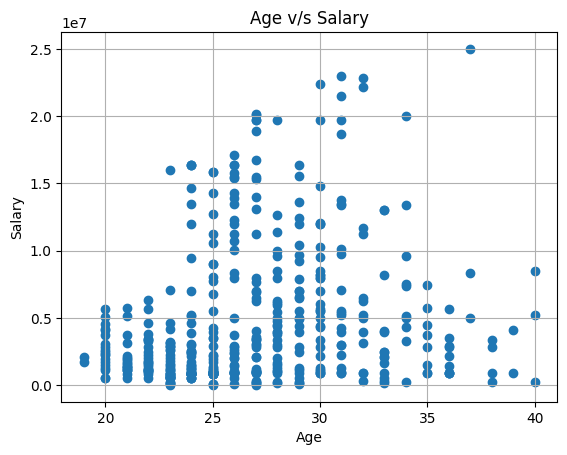

In [57]:
plt.scatter(data_player['Age'], data_player['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age v/s Salary')
plt.grid(True)
plt.show()